### <center>CovInsights Dataset Prep and Analysis</center>

**Dataset Source**

- The dataset has been taken from : https://data.adb.org/dataset/covid-19-economic-impact-assessment-template

**Tech Stack Used**
- Frontend - React Native Mobile App
- Backend - Flask hosted over Digital Ocean

### Importing all packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
df = pd.read_csv('Dataset.csv')

### Data Cleaning

In [3]:
df.replace('na', np.nan, inplace=True)
print(df.shape)
df.head()

(1576, 10)


,Economy,ADB Country Code,Sector,Country 2018 GDP,Scenario,as % of total GDP,in $ Mn,Employment (in 000),as % of sector GDP,as % of sector employment
0,Australia,AUS,"Agriculture, Mining and Quarrying",1433904.349,"Shorter containment, smaller demand shock",-0.33,"4,671.70",18,-2.70,-2.65
1,Australia,AUS,"Business, Trade, Personal, and Public Services",1433904.349,"Shorter containment, smaller demand shock",-1.41,"20,147.01",191,-2.31,-2.29
2,Australia,AUS,Hotel and restaurants and Other Personal Services,1433904.349,"Shorter containment, smaller demand shock",-0.35,"5,023.10",112,-6.70,-7.24
3,Australia,AUS,"Light/Heavy Manufacturing, Utilities, and Cons...",1433904.349,"Shorter containment, smaller demand shock",-0.39,"5,660.89",54,-2.31,-2.29
4,Australia,AUS,Transport services,1433904.349,"Shorter containment, smaller demand shock",-0.30,"4,307.48",47,-6.47,-7.22


> Dropping Null Values

In [4]:
df.dropna(inplace=True, thresh=10)
df.shape

(1008, 10)

> Changing the data types

In [5]:
df['as % of sector GDP'] = df['as % of sector GDP'].apply(pd.to_numeric, errors='coerce')
df['Country 2018 GDP'] = df['Country 2018 GDP'].apply(pd.to_numeric, errors='coerce')
df['as % of sector employment'] = df['as % of sector employment'].apply(pd.to_numeric, errors='coerce')
df['as % of total GDP'] = df['as % of total GDP'].apply(pd.to_numeric, errors='coerce')
df[' in $ Mn '] = df[' in $ Mn '].apply(pd.to_numeric, errors='coerce')
df['Employment (in 000)'] = df['Employment (in 000)'].apply(pd.to_numeric, errors='coerce')

### Extracting data for the Table - GDP (Country, GDP)

In [6]:
df.shape

(1008, 10)

In [7]:
df_GDP = df[['Economy', 'Country 2018 GDP']]

In [8]:
df_GDP.columns = ['Country', 'GDP']
df_GDP.drop_duplicates(inplace=True)
df_GDP.reset_index(inplace=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_GDP.drop('index', inplace=True, axis=1)
df_GDP

/home/sudharsan/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,GDP
0,Australia,1.433904e+06
1,Austria,4.552858e+05
2,Belgium,5.427611e+05
3,Bulgaria,6.513295e+04
4,Brazil,1.868626e+06
...,...,...
57,Cambodia,2.454247e+04
58,Maldives,5.327457e+03
59,Nepal,2.904040e+04
60,Singapore,3.641567e+05


In [10]:
df_GDP.sort_values(inplace=True, by='GDP', ascending=False)
df_GDP

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,GDP
42,United States,2.054434e+07
7,People's Republic of China,1.360815e+07
24,Japan,4.971323e+06
10,Germany,3.947620e+06
16,United Kingdom,2.855297e+06
...,...,...
49,Mongolia,1.306675e+04
56,Kyrgyz Republic,8.092837e+03
52,Fiji,5.536760e+03
58,Maldives,5.327457e+03


In [11]:
#Saving the CSV for Table GDPs

df_GDP.to_csv('GDPs.csv', index=False)

### Data Analysis

> *Top 5 Affected Countries*

In [12]:
df_Top5GDP = df[(df.Scenario == 'Longer containment, larger demand shock') & (df.Sector == '_All')]

In [13]:
#Top 5
df_Top5GDP.sort_values(inplace=True, by='as % of total GDP', ascending=True)
df_Top5GDP.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Economy,ADB Country Code,Sector,Country 2018 GDP,Scenario,as % of total GDP,in $ Mn,Employment (in 000),as % of sector GDP,as % of sector employment
725,Maldives,MLD,_All,5327.45715,"Longer containment, larger demand shock",-14.17,755.15,22,-14.17,-12.69
425,Cyprus,CYP,_All,24961.98866,"Longer containment, larger demand shock",-10.94,NaN,45,-10.94,-12.37
575,Poland,POL,_All,585663.81480,"Longer containment, larger demand shock",-8.81,NaN,1790,-8.81,-8.86
479,Greece,GRC,_All,218031.84460,"Longer containment, larger demand shock",-8.40,NaN,355,-8.40,-6.84
545,Latvia,LVA,_All,34409.22918,"Longer containment, larger demand shock",-8.14,NaN,86,-8.14,-7.27


> Top 5 affected Sectors (GDP and Employment)

In [14]:
sectors = ['Agriculture, Mining and Quarrying',
       'Business, Trade, Personal, and Public Services',
       'Hotel and restaurants and Other Personal Services',
       'Light/Heavy Manufacturing, Utilities, and Construction',
       'Transport services']

impact = []

In [15]:
df_Sec1 = df[(df.Sector == sectors[0]) & (df.Scenario == 'Longer containment, larger demand shock')]
impact.append((df_Sec1['as % of sector GDP'].sum())/df_Sec1.shape[0])
print(sectors[0] +":"+ str(impact[0]))

df_Sec2 = df[(df.Sector == sectors[1]) & (df.Scenario == 'Longer containment, larger demand shock')]
impact.append((df_Sec2['as % of sector GDP'].sum())/df_Sec1.shape[0])
print(sectors[1] +":"+ str(impact[1]))

df_Sec3 = df[(df.Sector == sectors[2]) & (df.Scenario == 'Longer containment, larger demand shock')]
impact.append((df_Sec3['as % of sector GDP'].sum())/df_Sec1.shape[0])
print(sectors[2] +":"+ str(impact[2]))

df_Sec4 = df[(df.Sector == sectors[3]) & (df.Scenario == 'Longer containment, larger demand shock')]
impact.append((df_Sec4['as % of sector GDP'].sum())/df_Sec1.shape[0])
print(sectors[3] +":"+ str(impact[3]))

df_Sec5 = df[(df.Sector == sectors[4]) & (df.Scenario == 'Longer containment, larger demand shock')]
impact.append((df_Sec5['as % of sector GDP'].sum())/df_Sec1.shape[0])
print(sectors[4] +":"+ str(impact[4]))

Agriculture, Mining and Quarrying:-4.140483870967741
Business, Trade, Personal, and Public Services:-4.038870967741936
Hotel and restaurants and Other Personal Services:-9.798709677419355
Light/Heavy Manufacturing, Utilities, and Construction:-4.012903225806451
Transport services:-14.283548387096777


In [16]:
impact = [abs(each) for each in impact]

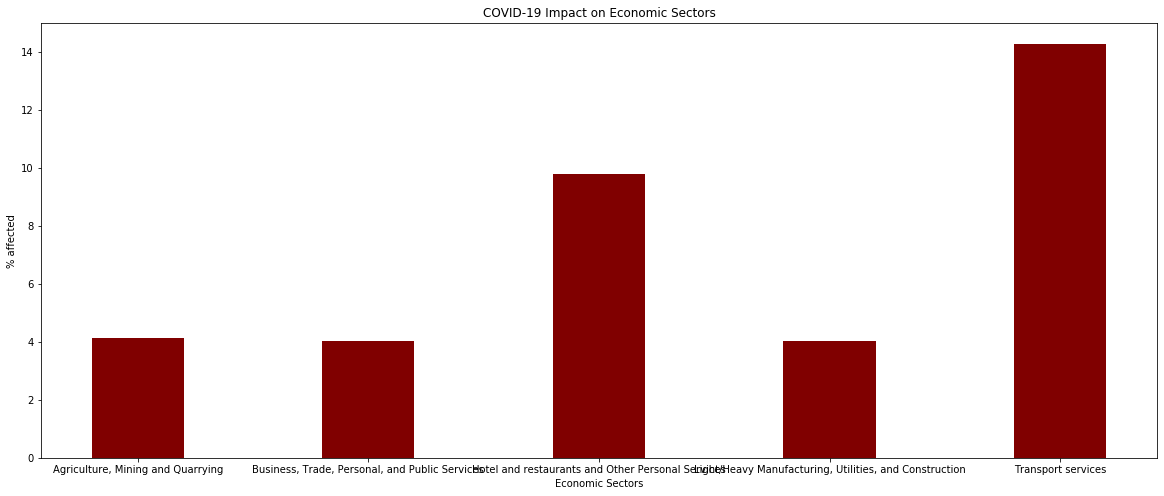

In [17]:
fig = plt.figure(figsize = (20, 8)) 
  
# creating the bar plot 
plt.bar(sectors, impact, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Economic Sectors") 
plt.ylabel("% affected") 
plt.title("COVID-19 Impact on Economic Sectors") 
plt.show() 

- Impact on Sector Employment 

In [18]:
impactEmp = []

df_Sec1 = df[(df.Sector == sectors[0]) & (df.Scenario == 'Longer containment, larger demand shock')]
impactEmp.append((df_Sec1['as % of sector employment'].sum())/df_Sec1.shape[0])
print(sectors[0] +":"+ str(impactEmp[0]))

df_Sec2 = df[(df.Sector == sectors[1]) & (df.Scenario == 'Longer containment, larger demand shock')]
impactEmp.append((df_Sec2['as % of sector employment'].sum())/df_Sec1.shape[0])
print(sectors[1] +":"+ str(impactEmp[1]))

df_Sec3 = df[(df.Sector == sectors[2]) & (df.Scenario == 'Longer containment, larger demand shock')]
impactEmp.append((df_Sec3['as % of sector employment'].sum())/df_Sec1.shape[0])
print(sectors[2] +":"+ str(impactEmp[2]))

df_Sec4 = df[(df.Sector == sectors[3]) & (df.Scenario == 'Longer containment, larger demand shock')]
impactEmp.append((df_Sec4['as % of sector employment'].sum())/df_Sec1.shape[0])
print(sectors[3] +":"+ str(impactEmp[3]))

df_Sec5 = df[(df.Sector == sectors[4]) & (df.Scenario == 'Longer containment, larger demand shock')]
impactEmp.append((df_Sec5['as % of sector employment'].sum())/df_Sec1.shape[0])
print(sectors[4] +":"+ str(impactEmp[4]))

Agriculture, Mining and Quarrying:-3.80016129032258
Business, Trade, Personal, and Public Services:-4.10483870967742
Hotel and restaurants and Other Personal Services:-9.753870967741936
Light/Heavy Manufacturing, Utilities, and Construction:-3.963709677419355
Transport services:-13.629032258064516


### Making the table Impact (Country, Sector, % GDP, % Emp)

In [19]:
df_Impact = df[df.Scenario == 'Longer containment, larger demand shock']

In [20]:
df_Impact.drop(['Country 2018 GDP', 'Scenario', 'ADB Country Code', ' in $ Mn ', 'Employment (in 000)', 'as % of sector GDP'], axis=1, inplace=True)

/home/sudharsan/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df_Impact.to_csv('Impact.csv', index=False)
df_Impact

,Economy,Sector,as % of total GDP,as % of sector employment
372,Australia,"Agriculture, Mining and Quarrying",-0.59,-5.13
373,Australia,"Business, Trade, Personal, and Public Services",-3.55,-5.87
374,Australia,Hotel and restaurants and Other Personal Services,-0.75,-15.38
375,Australia,"Light/Heavy Manufacturing, Utilities, and Cons...",-1.01,-5.94
376,Australia,Transport services,-0.64,-15.29
...,...,...,...,...
739,"Hong Kong, China","Business, Trade, Personal, and Public Services",-1.19,-1.40
740,"Hong Kong, China",Hotel and restaurants and Other Personal Services,-0.20,-1.60
741,"Hong Kong, China","Light/Heavy Manufacturing, Utilities, and Cons...",-0.06,-0.78
742,"Hong Kong, China",Transport services,-1.29,-22.30


### Making the table ImpactPredicted (Country, Sector, % GDP, % Emp)

In [24]:
df_ImpactPredicted = df[df.Scenario == 'Additional impact under Longer containment, larger demand shock']

In [25]:
df_ImpactPredicted.drop(['Country 2018 GDP', 'Scenario', 'ADB Country Code', ' in $ Mn ', 'Employment (in 000)', 'as % of sector GDP'], axis=1, inplace=True)

/home/sudharsan/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df_ImpactPredicted.to_csv('ImpactPredicted.csv', index=False)
df_ImpactPredicted

,Economy,Sector,as % of total GDP,as % of sector employment
1236,Indonesia,"Agriculture, Mining and Quarrying",-0.80,-4.32
1237,Indonesia,"Business, Trade, Personal, and Public Services",-1.72,-5.11
1238,Indonesia,Hotel and restaurants and Other Personal Services,-0.25,-4.88
1239,Indonesia,"Light/Heavy Manufacturing, Utilities, and Cons...",-1.39,-4.34
1240,Indonesia,Transport services,-0.28,-4.84
...,...,...,...,...
1483,"Hong Kong, China","Business, Trade, Personal, and Public Services",-2.28,-3.21
1484,"Hong Kong, China",Hotel and restaurants and Other Personal Services,-0.27,-4.15
1485,"Hong Kong, China","Light/Heavy Manufacturing, Utilities, and Cons...",-0.37,-4.64
1486,"Hong Kong, China",Transport services,-0.09,-1.57
